<a href="https://colab.research.google.com/github/Ichchha-coder/Projects_/blob/main/crop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import numpy as np

In [ ]:
data_path=os.path.join('/content/drive/MyDrive/fuse_project/data/crop.csv')
data=pd.read_csv(data_path)

FileNotFoundError: ignored

In [ ]:
data.head(10)

In [ ]:
data.shape

In [ ]:

data.columns

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2200 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 172.0+ KB


In [ ]:
data['CROP'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [ ]:
len(data['CROP'].unique())

22

In [ ]:
data['STATE'].unique()

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Assam', 'Chattisgarh',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Nagaland', 'Odisha',
       'Pondicherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttrakhand', 'West Bengal'],
      dtype=object)

In [ ]:
len(data['STATE'].unique())

26

In [ ]:
data.drop(['CROP_PRICE'],axis=1,inplace=True)

In [ ]:
data.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,Rice


In [ ]:
data['STATE']

0       Andaman and Nicobar
1       Andaman and Nicobar
2       Andaman and Nicobar
3       Andaman and Nicobar
4       Andaman and Nicobar
               ...         
2195            West Bengal
2196            West Bengal
2197            West Bengal
2198            West Bengal
2199            West Bengal
Name: STATE, Length: 2200, dtype: object

In [ ]:
# state_one_hot_encoded=pd.get_dummies(data['STATE'])

In [ ]:
# # Concatenate the one-hot encoded dataframe with the original dataframe
# df_encoded = pd.concat([data, state_one_hot_encoded], axis=1)

In [ ]:
# df_encoded

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# class_le = LabelEncoder()
# class_le.fit_transform(data['CROP'].values)

class_mapping = {label:idx for idx, label in enumerate(np.unique(data['CROP']))}
print(class_mapping)

data['CROP'] =data['CROP'].map(class_mapping)

{'Apple': 0, 'Banana': 1, 'Blackgram': 2, 'ChickPea': 3, 'Coconut': 4, 'Coffee': 5, 'Cotton': 6, 'Grapes': 7, 'Jute': 8, 'KidneyBeans': 9, 'Lentil': 10, 'Maize': 11, 'Mango': 12, 'MothBeans': 13, 'MungBean': 14, 'Muskmelon': 15, 'Orange': 16, 'Papaya': 17, 'PigeonPeas': 18, 'Pomegranate': 19, 'Rice': 20, 'Watermelon': 21}


In [ ]:
data.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,20


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# # Create an instance of OneHotEncoder
# encoder = OneHotEncoder()

pipeline=ColumnTransformer([
    ('one_hot_encoder',OneHotEncoder(),['STATE'])
    ])

# Fit and transform the categorical column
encoded_data = pipeline.fit_transform(data)

In [ ]:
encoded_data

<2200x26 sparse matrix of type '<class 'numpy.float64'>'
	with 2200 stored elements in Compressed Sparse Row format>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data['CROP'].value_counts()

20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: CROP, dtype: int64

In [ ]:
data_x=data.drop('CROP',axis=1)
data_y=data['CROP'].copy()

In [ ]:
data_x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar


In [ ]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,stratify=data_y ,test_size=0.20, random_state=42)


In [ ]:
X_train.shape

(1760, 8)

In [ ]:
y_train

1607    16
1212     7
362      9
566     13
1671    16
        ..
808     10
422     18
2052     8
2083     8
1282     7
Name: CROP, Length: 1760, dtype: int64

In [ ]:
#scaling the data
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train,y_train)

print(scaler.mean_)
scaled_X_train=scaler.transform(X_train)




# pipe = make_pipeline(StandardScaler())
# pipe.fit(X_train, y_train)

# pipe.score(X_test, y_test)

ValueError: ignored

In [ ]:
scaled_X_test=scaler.transform(X_test)

In [ ]:
scaled_X_train.shape

(1760, 7)

In [ ]:
y_train

1607    16
1212     7
362      9
566     13
1671    16
        ..
808     10
422     18
2052     8
2083     8
1282     7
Name: CROP, Length: 1760, dtype: int64

# **Model**

#### **Softmax Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class="multinomial",max_iter=200,solver="lbfgs", C=10)
softmax_reg.fit(scaled_X_train,y_train)

LogisticRegression(C=10, max_iter=200, multi_class='multinomial')

In [ ]:
softmax_reg.predict([[90,42,43,20.879744,82.002744,6.502985,202.935536]])

NameError: ignored

In [ ]:
softmax_reg.predict_proba([[91,42,43,20.879744,82.002744,6.502985,180.935536]])

array([[2.66044829e-307, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 1.40457515e-255,
        0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
        0.00000000e+000]])

In [ ]:
scaled_X_test

array([[-1.01886937, -0.92111041, -0.83131839, ...,  0.84613888,
         1.13848097, -0.01374611],
       [ 1.28763233,  0.77904019,  0.03662768, ...,  0.58616143,
        -0.04841589, -0.2253062 ],
       [ 2.42731552, -0.46571293, -0.65378397, ...,  0.20050841,
        -0.57771584, -0.60999985],
       ...,
       [ 0.52784353, -0.46571293, -0.25926302, ...,  0.35250427,
         0.68989384,  1.10624666],
       [-0.80178686,  2.44883096,  3.03498685, ...,  0.38629579,
        -0.06182135, -0.69398814],
       [-0.39475715,  0.41472221, -0.4565235 , ..., -1.56631835,
        -0.0712168 ,  0.59286777]])

In [ ]:
y_pred=softmax_reg.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9772727272727273

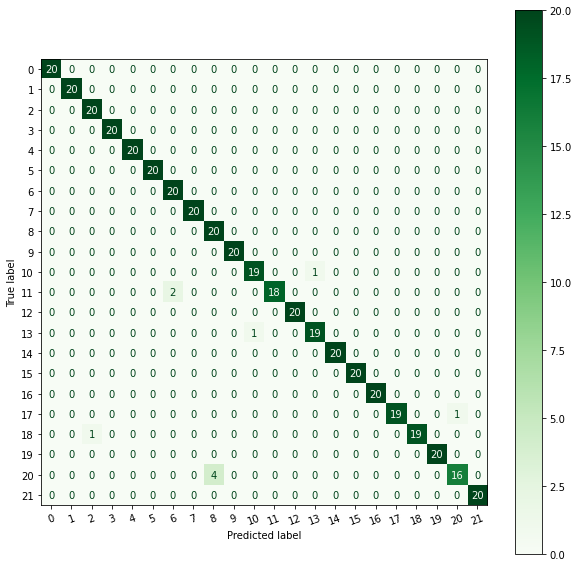

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


def plot_confusion_matrix(labels, pred_labels, classes):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = confusion_matrix(labels, pred_labels)
    cm = ConfusionMatrixDisplay(cm, display_labels=classes)
    cm.plot(values_format='d', cmap='Greens', ax=ax)
    plt.xticks(rotation=20)


plot_confusion_matrix(y_test, y_pred, np.unique(data['CROP']))

#### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(scaled_X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
clf.predict([[90,42,43,20.879744,82.002744,6.502985,202.935536]])

NameError: ignored

In [ ]:
y_pred=clf.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9795454545454545

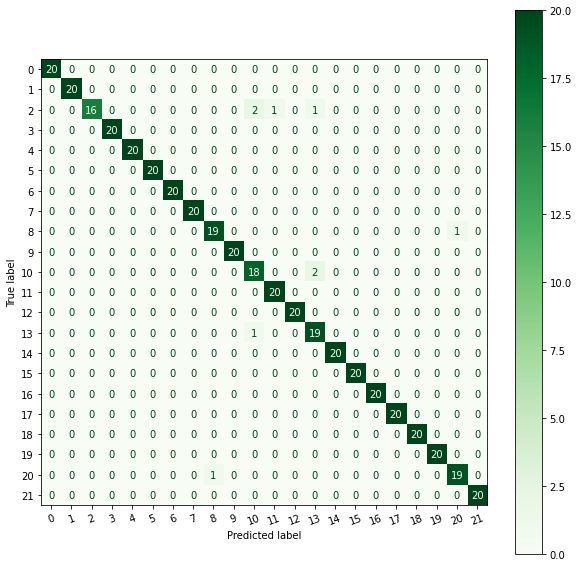

In [ ]:
def plot_confusion_matrix(labels, pred_labels, classes):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = confusion_matrix(labels, pred_labels)
    cm = ConfusionMatrixDisplay(cm, display_labels=classes)
    cm.plot(values_format='d', cmap='Greens', ax=ax)
    plt.xticks(rotation=20)


plot_confusion_matrix(y_test, y_pred, np.unique(data['CROP']))

#### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(scaled_X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
clf.predict([[90,42,43,20.879744,82.002744,6.502985,202.935536]])

array([0])

In [ ]:
y_pred=clf.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9931818181818182

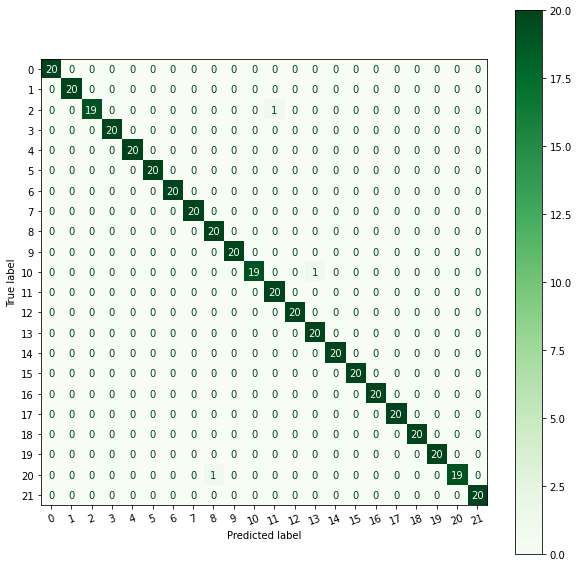

In [ ]:
def plot_confusion_matrix(labels, pred_labels, classes):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = confusion_matrix(labels, pred_labels)
    cm = ConfusionMatrixDisplay(cm, display_labels=classes)
    cm.plot(values_format='d', cmap='Greens', ax=ax)
    plt.xticks(rotation=20)


plot_confusion_matrix(y_test, y_pred, np.unique(data['CROP']))